In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## New settings

In [28]:
EXPERIMENT = 'pairwise_power'

tag = ''# '_paper'

df = pd.read_csv(f'./results/{EXPERIMENT}_results{tag}.csv', sep=', ', engine='python')

In [29]:
plot_df = df.melt(
    id_vars=[
        'params_index', 'n_variables', 'n_total_environments', 'sparsity',
        'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
        'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
    # value_vars=['True orientation rate', 'False orientation rate'],# 'Avg precision'], # 'Fraction of possible DAGs'], 
    value_vars=['Precision', 'Recall'], #'Avg precision'],
    var_name='Metric',
    value_name='Average fraction',
)

x_var_rename_dict = {
#     'Number of environments': '# Environments',
#     'Fraction of shifting mechanisms': 'Shift fraction',
#     'dag_density': 'Edge density',
#     'n_variables': '# Variables',
#     'sample_size': '# Samples',
}

plot_df = plot_df.rename(
        x_var_rename_dict, axis=1
    ).replace(
        {
            'er': 'Erdos-Renyi',
            'ba': 'Hub',
            'PC (pool all)': 'Full PC (oracle)',
            'Full PC (KCI)': 'Augmented PC (KCI)',
            'Min changes (KCI)': 'MSS (KCI)',
            'Min changes (GAM)': 'MSS (GAM)',
            'Min changes (Linear)': 'MSS (Linear)',
            'Min changes (FisherZ)': 'MSS (FisherZ)'
            ''
        }
)

In [30]:
plot_df['Method'].unique()

array(['Full PC (oracle)', 'Min changes (oracle)', 'MSS (KCI)',
       'MSS (Linear)', 'MSS (GAM)', 'MSS (FisherZ)', 'Augmented PC (KCI)',
       'MC'], dtype=object)

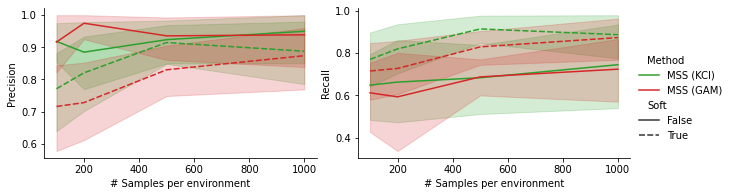

In [32]:
for ds in plot_df['dag_simulator'].unique():
    g = sns.relplot(
        data=plot_df[
            (plot_df['Number of environments'] == 3)
            & (plot_df['params_index'] >= 13)
            & (plot_df['params_index'] < 18)
            # & (plot_df['Number of environments'].max())
            # 
            & (plot_df['Method'].isin(['MSS (KCI)', 'MSS (GAM)']))
            & (plot_df['dag_simulator'] == ds)
            # & (plot_df['sparsity'].isin([3, 4]))#,2,3,4]))
            # & (plot_df['Soft'] == False)
        ].rename(
            {"sample_size": "# Samples per environment"}, axis=1
        ),
        x='# Samples per environment',
        y='Average fraction',
        hue='Method',
        # row='sparsity',
        col='Metric',
        style='Soft',
        # ci=None,
        palette=[
            sns.color_palette("tab10")[i]
            for i in [2, 3]
        ],
        kind='line',
        height=3,
        aspect=1.5, # 3,
        # legend='Full',
        facet_kws={'sharey': False, 'sharex': True},
    )

    col_vals = g.data[g._col_var].unique()
    for c, col_val in enumerate(col_vals):
        g.axes[0, c].set_ylabel(col_val, visible=True)
        g.axes[0, c].set_title('')

    title_dict = dict({"er": "Erdos-Renyi", "ba": "Hub"})
    # g.fig.suptitle(f'DAG model: {title_dict[ds]}', fontsize=14, y=1.02, x=0.45)
    plt.subplots_adjust(wspace=0.15)
    plt.savefig('./figures/soft_samples_plot.pdf')
    plt.show()

# previous

In [22]:
EXPERIMENT = 'soft_samples'
df = pd.read_csv(f'./results/{EXPERIMENT}_results_paper.csv', sep=', ', engine='python')

In [23]:
plot_df = df.melt(
    id_vars=[
        'params_index', 'n_variables', 'n_total_environments', 'sparsity',
        'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
        'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
    # value_vars=['True orientation rate', 'False orientation rate'],# 'Avg precision'], # 'Fraction of possible DAGs'], 
    value_vars=['Precision', 'Recall'], #'Avg precision'],
    var_name='Metric',
    value_name='Average fraction',
)

## Average

In [ ]:
for ds in plot_df['dag_simulator'].unique():
    g = sns.relplot(
        data=plot_df[
            (plot_df['Number of environments'] == 5)
            & (plot_df['Number of environments'].max())
            & (plot_df['Method'].isin(['Full PC (oracle)', 'Min changes (oracle)', 'Min changes (kci)']))
            & (plot_df['dag_simulator'] == ds)
            & (plot_df['sparsity'].isin([3, 4]))#,2,3,4]))
            # & (plot_df['Soft'] == False)
        ].rename(
            {"sample_size": "Number of samples per environment"}, axis=1
        ),
        x='Number of samples per environment',
        y='Average fraction',
        hue='Method',
        # row='sparsity',
        col='Metric',
        style='Soft',
        # ci=None,
        kind='line',
        height=3,
        aspect=2, # 3,
        # legend='Full',
        facet_kws={'sharey': True, 'sharex': True},
    )

    col_vals = g.data[g._col_var].unique()
    for c, col_val in enumerate(col_vals):
        g.axes[0, c].set_ylabel(col_val, visible=True)
        g.axes[0, c].set_title('')

    title_dict = dict({"er": "Erdos-Renyi", "ba": "Hub"})
    # g.fig.suptitle(f'DAG model: {title_dict[ds]}', fontsize=14, y=1.02, x=0.45)
    plt.subplots_adjust(wspace=0.06)
    plt.savefig('./soft_samples_plot.pdf')
    plt.show()

## Individual

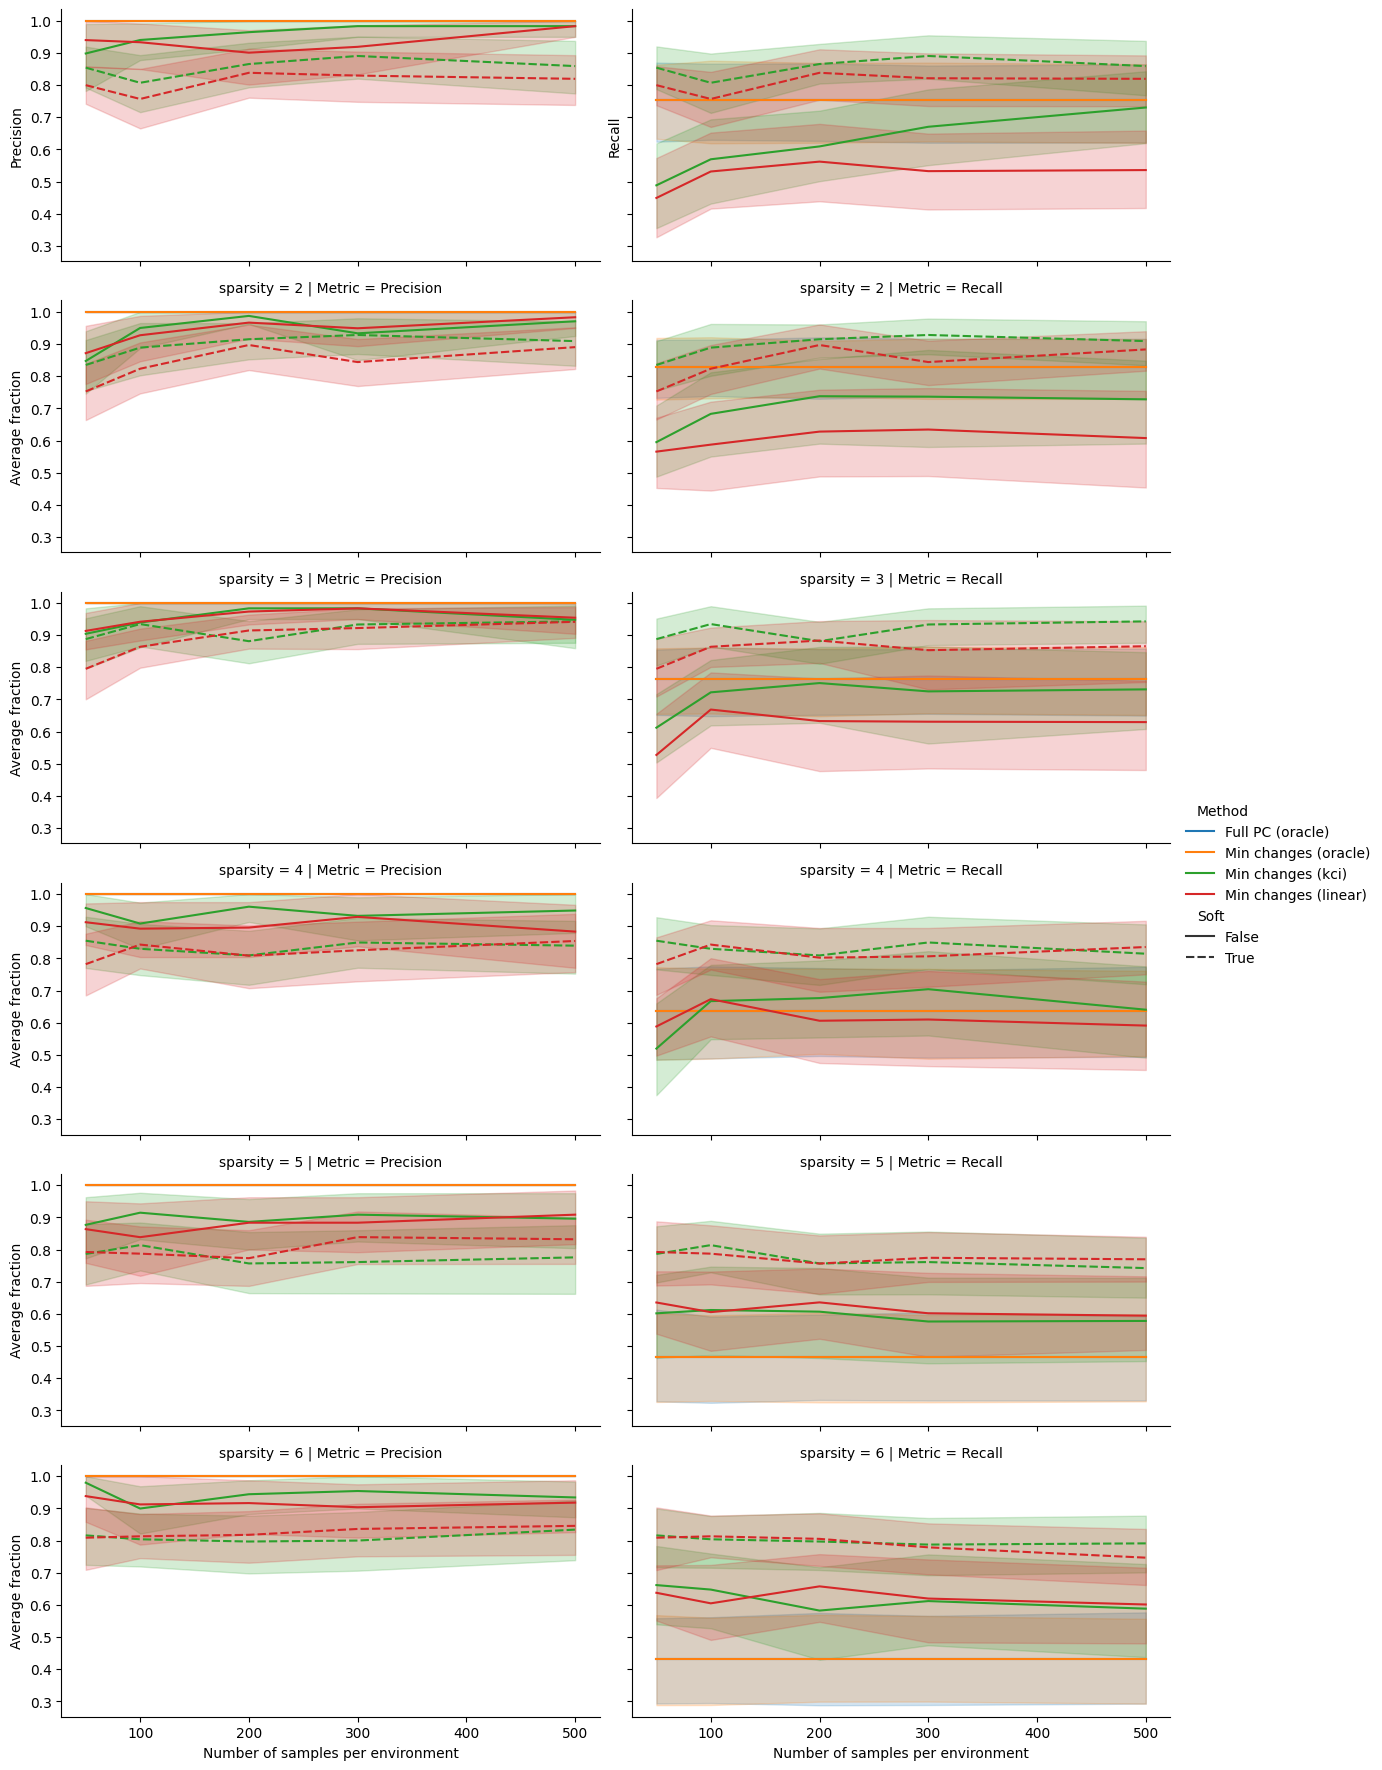

In [18]:
for ds in plot_df['dag_simulator'].unique():
    g = sns.relplot(
        data=plot_df[
            (plot_df['Number of environments'] == 2)
            & (plot_df['Number of environments'].max())
            # & (plot_df['Method'].isin(['Full PC (oracle)', 'Min changes (oracle)', 'Min changes (kci)']))
            & (plot_df['dag_simulator'] == ds)
            # & (plot_df['sparsity'].isin([2, 3, 4]))#,2,3,4]))
            # & (plot_df['Soft'] == False)
        ].rename(
            {"sample_size": "Number of samples per environment"}, axis=1
        ),
        x='Number of samples per environment',
        y='Average fraction',
        hue='Method',
        row='sparsity',
        col='Metric',
        style='Soft',
        # ci=None,
        kind='line',
        height=3,
        aspect=2, # 3,
        # legend='Full',
        facet_kws={'sharey': True, 'sharex': True},
    )

    col_vals = g.data[g._col_var].unique()
    for c, col_val in enumerate(col_vals):
        g.axes[0, c].set_ylabel(col_val, visible=True)
        g.axes[0, c].set_title('')

    title_dict = dict({"er": "Erdos-Renyi", "ba": "Hub"})
    # g.fig.suptitle(f'DAG model: {title_dict[ds]}', fontsize=14, y=1.02, x=0.45)
    plt.subplots_adjust(wspace=0.06)
    # plt.savefig('./soft_samples_plot.pdf')
    plt.show()